In [2]:
import bayesianMarkovKernel as bmk 

import numpy as np 
import seaborn as sns 

import torch 
import matplotlib.pyplot as plt 

In [8]:
transition_matrix = torch.tensor([[0.8, 0.2], [0.4, 0.6], [0.5, 0.3]], dtype = torch.float32)
markov_kernel = bmk.MarkovKernel(transition_matrix)
bayesian_inverter = bmk.BayesianInverter(3, 3)

input_data = torch.tensor([[0.7, 0.3, 0.4], [0.2, 0.8, 0.5]], dtype = torch.float32)
output = bmk.compose(markov_kernel, bayesian_inverter).apply(input_data)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 3x128)

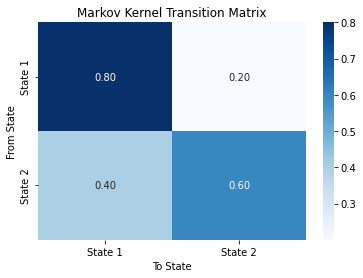

In [8]:
sns.heatmap(transition_matrix, annot = True, cmap = "Blues", fmt = ".2f", 
            xticklabels = ["State 1", "State 2"], yticklabels = ["State 1", "State 2"])
plt.title("Markov Kernel Transition Matrix")
plt.xlabel("To State")
plt.ylabel("From State")
plt.show()

In [9]:
from torchsummary import summary

input_dim = 3
output_dim = 3 

summary(bayesian_inverter.model, (input_dim, ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             384
              ReLU-2                  [-1, 128]               0
            Linear-3                    [-1, 2]             258
           Sigmoid-4                    [-1, 2]               0
Total params: 642
Trainable params: 642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


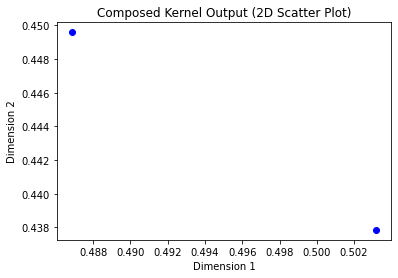

In [13]:
if output.shape[1] == 2:
    plt.scatter(output.detach().numpy()[:, 0], output.detach().numpy()[:, 1], c='b', marker='o')
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Composed Kernel Output (2D Scatter Plot)")
    plt.show()
elif output.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(output[:, 0], output[:, 1], output[:, 2], c='b', marker='o')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')

    plt.title("Composed Kernel Output (3D Scatter Plot)")
    plt.show()
else:
    print(f"Cannot visualize output with {output.shape[1]} dimensions. Visualization supports 2D or 3D outputs.")

In [14]:
from scipy.stats import gaussian_kde

if input_data.shape[1] == 3:
    kde = gaussian_kde(input_data.T)
    density = kde(input_data.T)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(input_data[:, 0], input_data[:, 1], input_data[:, 2], c=density, cmap="viridis", marker='o')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')

    plt.title("3D KDE Plot for Input Data")
    plt.show()
else:
    print("Input data does not have three dimensions. Cannot create 3D KDE plot.")


Input data does not have three dimensions. Cannot create 3D KDE plot.
